In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [5]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [6]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6223776223776224

In [7]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.626056338028169)

In [10]:
trf= ColumnTransformer([
    ('first', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy = 'quantile'),[0]),
    ('second', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy = 'quantile'),[1])
],remainder='passthrough')

'''
('name of trf', object, column_index)
'''

In [11]:
'''
the X_train_trf and X_test_trf will only have the age_trf and fare_trf columns because that's what we get when we transform both
age and fare columns of X_train/test.
'''

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [13]:
'''
remember always that after the transform, we will have the array and not pandas series of dataframe.
'''
X_train_trf

array([[5., 5.],
       [4., 4.],
       [5., 5.],
       ...,
       [7., 9.],
       [6., 5.],
       [6., 2.]])

In [15]:
#gives the intervals (minima of the interval range)
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [16]:
'''
if we want our table in the dataframe format, we need to convert our transformed data (in arrays) to df.
'''
output_df = pd.DataFrame({
    'Age':X_train['Age'],
    'Age_trf':X_train_trf[:,0],
    'Fare':X_train['Fare'],
    'Fare_trf': X_train_trf[:,1]
})
output_df.head()

,Age,Age_trf,Fare,Fare_trf
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0


In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [22]:
'''
below is the function where we give the number of bins and the strategy for KBinsDiscretizer. We didn't give the 3rd parameter because most
of the time, we are just using odrinal encoding.
'''
def discretize(bins,strategy):


    trf = ColumnTransformer([
        ('first',KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy),[0]),
        ('second',KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy),[1])
    ], remainder='passthrough')

    X_trf = trf.fit_transform(X) #X is what we got are doing iloc splitting of the dataset
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))) #just for printing accuracy obtained from selecting particular parameters.

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Age Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("Age After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Fare Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare After")

    plt.show()


0.6274843505477309


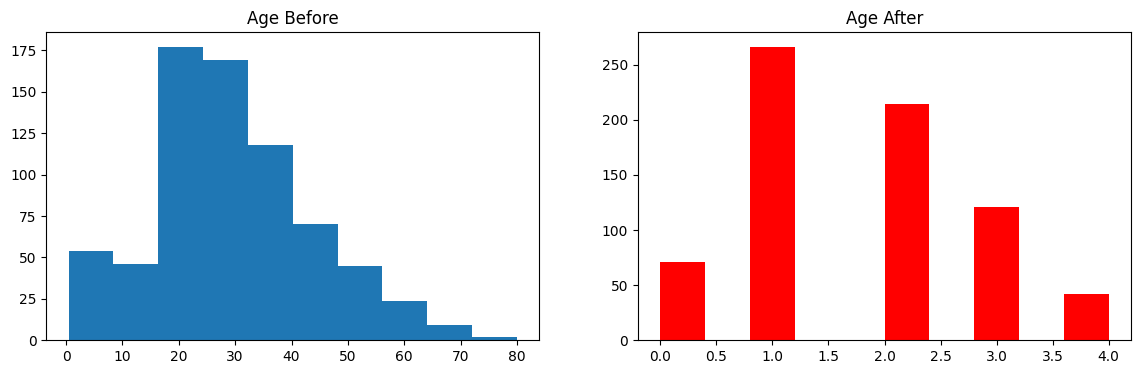

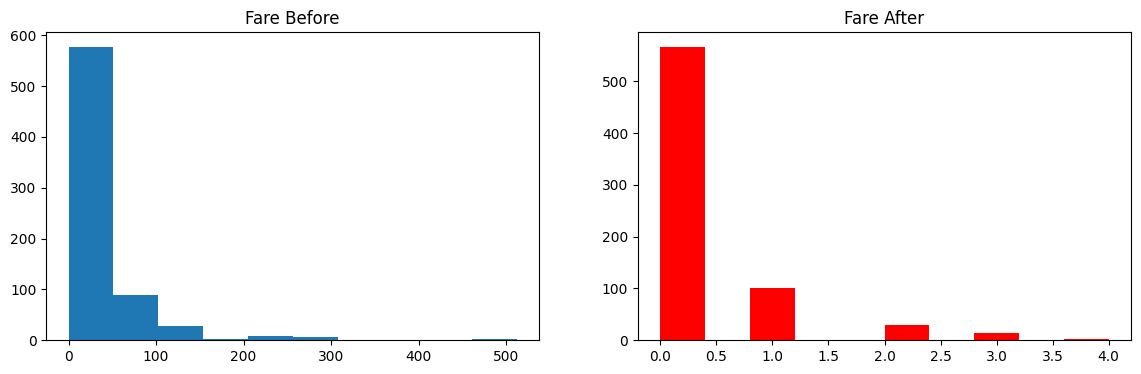

In [23]:
discretize(5,'kmeans')

0.6303403755868545


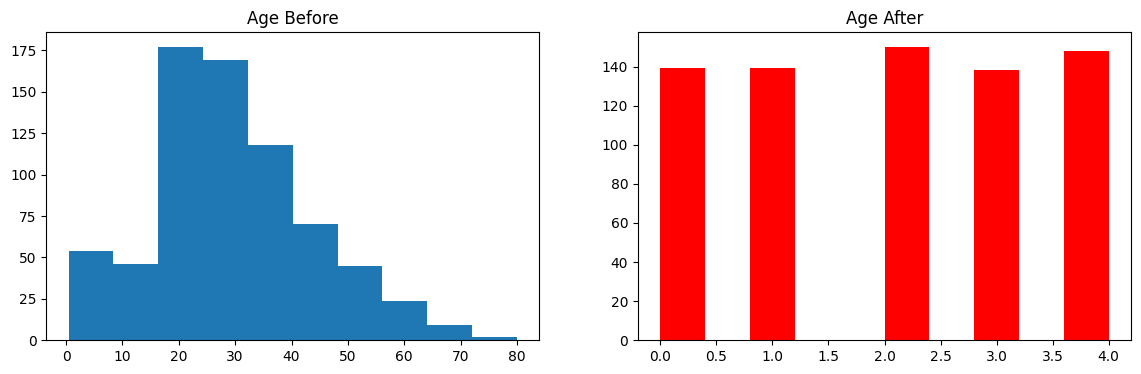

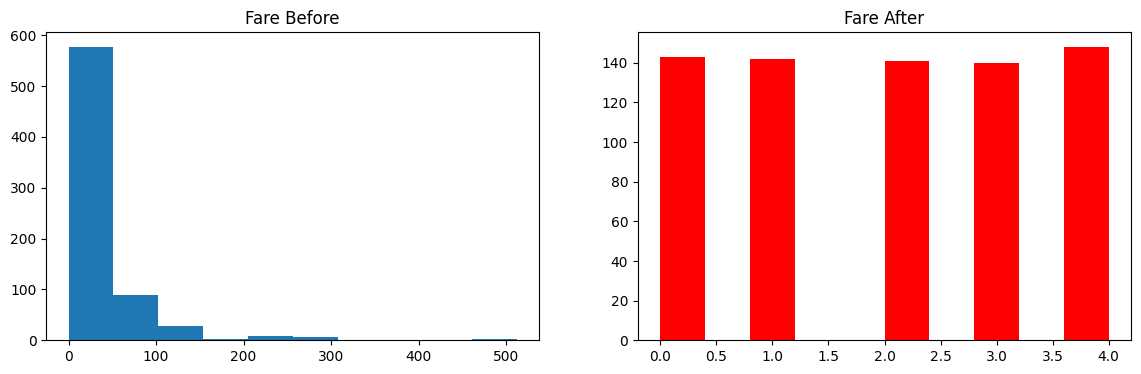

In [24]:
discretize(5,'quantile')
'''
you can see how the distribution became uniform.
'''